# Exploratory Data Analysis

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings # For handling error messages.

In [2]:
file = 'internet_electricity_data.csv'
df = pd.read_csv(file, index_col=[0,1])

In [3]:
#Getting info about the dataframe. We can see that there are some discrepencies in non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4384 entries, ('AFG', 1990) to ('ZWE', 2014)
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   int_perc              4384 non-null   float64
 1   electricity_consumed  4384 non-null   float64
 2   energy_consumed       4334 non-null   float64
 3   population            4383 non-null   float64
 4   GDP                   4373 non-null   float64
 5   continent             4384 non-null   object 
 6   country_name          4384 non-null   object 
dtypes: float64(5), object(2)
memory usage: 259.9+ KB


In [4]:
df.head()

int_perc  electricity_consumed  energy_consumed  population  \
Country Date                                                                
AFG     1990       0.0               1.02114         8.726855     12412.3   
        1991       0.0               1.04477         3.567050     13299.0   
        1992       0.0               0.76805         2.159523     14485.5   
        1993       0.0               0.72961         1.964312     15816.6   
        1994       0.0               0.75017         1.761633     17075.7   

                  GDP continent country_name  
Country Date                                  
AFG     1990  33.5173      Asia  Afghanistan  
        1991  30.4497      Asia  Afghanistan  
        1992  30.0136      Asia  Afghanistan  
        1993  24.2715      Asia  Afghanistan  
        1994  18.6874      Asia  Afghanistan

## Exploring USA Data

In [5]:
usa = df.loc['USA']

The corr()function will show the Pearson Correlation Coeficient for all of the variables in the dataset, which indicates how related two variables are according to a linear model. A heatmap will graphically describe the Pearson Correlation Coeficient.

In [6]:
#Calculating the pearson correlation coeficients
usa.corr()

,int_perc,electricity_consumed,energy_consumed,population,GDP
int_perc,1.000000,0.977759,-0.611480,0.975087,0.991177
electricity_consumed,0.977759,1.000000,-0.511322,0.964462,0.981268
energy_consumed,-0.611480,-0.511322,1.000000,-0.710345,-0.646620
population,0.975087,0.964462,-0.710345,1.000000,0.991139
GDP,0.991177,0.981268,-0.646620,0.991139,1.000000


<AxesSubplot:>

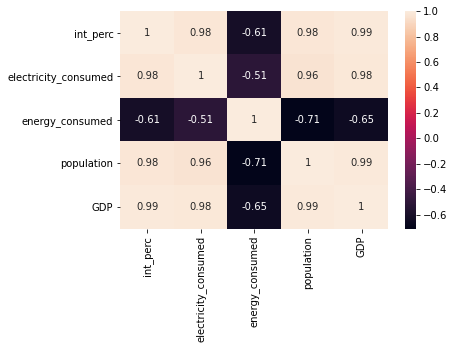

In [7]:
#Making the heatmap
sns.heatmap(usa.corr(), annot=True)

It appears that 'energy_consumed' won't be very useful for this question and needs to be removed from the dataset. Energy consumed and electricity consumed were expected to be fairly similar, and electricity consumed is more highly correlated with the other features. 'energy_consumed' may have something weird with the units that is throwing it off, regardless 'electricity_consumed' should be good on its own.

In [8]:
#Removing the 'energy_consumed' feature
df = df.drop(['energy_consumed'], axis = 1)

In [9]:
usa = df.loc['USA']

With 'energy_consumed' removed an updated heatmap will show a higher level of detail for analyis.

<AxesSubplot:>

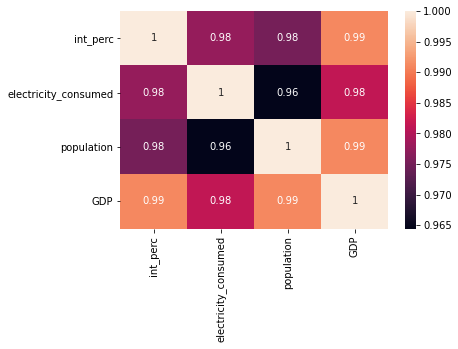

In [10]:
#Creating the updated heatmap, much better now that 'energy_consumed' is removed.
sns.heatmap(usa.corr(), annot = True)

In [11]:
#Calculating pearson correlation coeficients once again. 
usa.corr()

,int_perc,electricity_consumed,population,GDP
int_perc,1.000000,0.977759,0.975087,0.991177
electricity_consumed,0.977759,1.000000,0.964462,0.981268
population,0.975087,0.964462,1.000000,0.991139
GDP,0.991177,0.981268,0.991139,1.000000


Most correlated variables according to the Pearson Correlation Coefficients:

1. **GDP (0.981273)** is the most correlated with Electricity Consumed.

2. **Internet Percentage (0.977767)** is the second most correlated with Electricity Consumed.

3. **Population (0.964465)** is the least correlated with Electricity Consumed (though still very correlated).

How do these features look when plotted with electricity consumed? Does the data appear to follow a linear distribution?

Text(0, 0.5, 'Electricity Consumed')

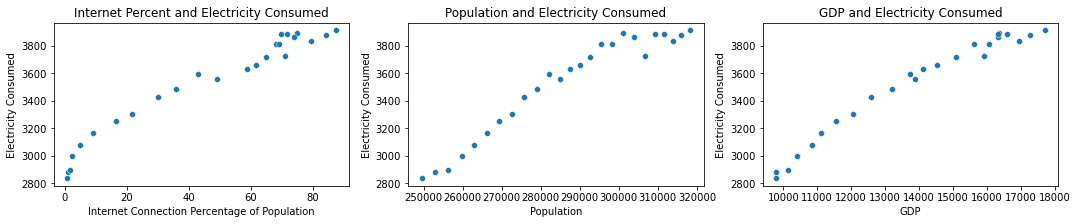

In [12]:
#Quick visualization of the different features and how they correlate with 'electricity_consumed'

fig, axes = plt.subplots(1, 3, figsize=(18,3))

sns.scatterplot(ax=axes[0], x=usa.int_perc, y=usa.electricity_consumed)
axes[0].set_title('Internet Percent and Electricity Consumed')
axes[0].set_xlabel('Internet Connection Percentage of Population')
axes[0].set_ylabel('Electricity Consumed')


sns.scatterplot(ax=axes[1], x=usa.population, y=usa.electricity_consumed)
axes[1].set_title('Population and Electricity Consumed')
axes[1].set_xlabel('Population')
axes[1].set_ylabel('Electricity Consumed')


sns.scatterplot(ax=axes[2], x=usa.GDP, y=usa.electricity_consumed)
axes[2].set_title('GDP and Electricity Consumed')
axes[2].set_xlabel('GDP')
axes[2].set_ylabel('Electricity Consumed')

It's confirmed that all three features appear to follow a linear distribution, as supported by the Pearson's r values, but this is just for the USA. What are the Pearson's r values for the other countries in the dataset? What is the global average r value for each variable/electricity consumption?

## Determining Linear Correlation Coeficients for All Countries in the Dataset

In [13]:
#Creating a list of country codes from the dataframe index.
country_codes = list(df.index.get_level_values(0).unique())

In [14]:
#Creating an empty list for 'internet_percentage' pearson correlation coeficient (r) values.
int_perc_r = []

#Calculating the correlation coeficient for each country, and appending to corresponding list.
for country in country_codes:
    country = df.loc[country]
    corr = country.corr()
    int_perc_r.append(corr.electricity_consumed.int_perc)

    
    
    
#Creating an empty list for 'internet_percentage' pearson correlation coeficient (r) values.
pop_r = []

#Calculating the correlation coeficient for each country, and appending to corresponding list.
for country in country_codes:
    country = df.loc[country]
    corr = country.corr()
    pop_r.append(corr.electricity_consumed.population)
    
    
    
    
#Creating an empty list for 'gdp' pearson correlation coeficient (r) values.
gdp_r = []

#Calculating the correlation coeficient for each country, and appending to corresponding list.
for country in country_codes:
    country = df.loc[country]
    corr = country.corr()
    gdp_r.append(corr.electricity_consumed.GDP)



In [15]:
pd.set_option('display.max_rows', 200)

In [16]:
corr_df = pd.DataFrame([gdp_r, int_perc_r, pop_r]).transpose()
corr_df = corr_df.assign(country = country_codes)
corr_df = corr_df.set_index('country')
corr_df.columns = ['gdp_r', 'int_perc_r', 'pop_r']
corr_df.head(200)

,gdp_r,int_perc_r,pop_r
country,,,
AFG,0.939003,0.965205,0.773343
ALB,0.882275,0.694129,-0.811028
DZA,0.969631,0.968227,0.961560
AGO,0.949954,0.968943,0.924379
ATG,0.863866,0.965845,0.958540
ARG,0.951081,0.926754,0.995431
ARM,0.570109,0.580463,-0.241119
AUS,0.972392,0.986680,0.942150
AUT,0.988416,0.983247,0.948873


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4384 entries, ('AFG', 1990) to ('ZWE', 2014)
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   int_perc              4384 non-null   float64
 1   electricity_consumed  4384 non-null   float64
 2   population            4383 non-null   float64
 3   GDP                   4373 non-null   float64
 4   continent             4384 non-null   object 
 5   country_name          4384 non-null   object 
dtypes: float64(4), object(2)
memory usage: 225.7+ KB


In [18]:
#Uncovering which countries have null values to address.
df[df.isnull().any(axis=1)]

int_perc  electricity_consumed  population  GDP continent  \
Country Date                                                              
CYP     1990  0.000000                 1.746     587.141  NaN    Europe   
        1991  0.000000                 1.818     603.069  NaN    Europe   
        1992  0.050060                 2.102     619.231  NaN    Europe   
        1993  0.056367                 2.296     632.944  NaN    Europe   
        1994  0.111035                 2.395     645.399  NaN    Europe   
HUN     1990  0.000000                34.143         NaN  NaN    Europe   
JOR     1990  0.000000                 3.119    3565.890  NaN      Asia   
        1991  0.000000                 3.324    3760.490  NaN      Asia   
MDA     1992  0.000000                 9.301    4356.900  NaN    Europe   
        1993  0.000000                 6.121    4345.600  NaN    Europe   
        1994  0.000825                 6.841    4350.500  NaN    Europe   

             country_name  
Country Date               
CYP     1990       Cyprus  
        1991       Cyprus  
        1992       Cyprus  
        1993       Cyprus  
        1994       Cyprus  
HUN     1990      Hungary  
JOR     1990       Jordan  
        1991       Jordan  
MDA     1992      Moldova  
        1993      Moldova  
        1994      Moldova

In [19]:
df.loc['PRK'].head(20)

,int_perc,electricity_consumed,population,GDP,continent,country_name
Date,,,,,,
1990,0.0,32.88500,20293.1,50.8667,Asia,Korea
1991,0.0,32.83700,20609.2,48.6198,Asia,Korea
1992,0.0,23.96800,20937.4,45.1755,Asia,Korea
1993,0.0,23.41900,21265.8,43.1522,Asia,Korea
1994,0.0,23.23000,21578.0,42.2414,Asia,Korea
1995,0.0,23.08400,21862.3,40.3936,Asia,Korea
1996,0.0,21.08200,22113.4,39.0394,Asia,Korea
1997,0.0,19.02500,22335.3,36.5083,Asia,Korea
1998,0.0,18.17400,22536.8,36.1782,Asia,Korea


In [20]:
df.loc['TLS'].head(20)

,int_perc,electricity_consumed,population,GDP,continent,country_name
Date,,,,,,
2003,0.000000,0.0,947.110,1.93073,Asia,Timor-Leste
2004,0.000000,0.0,971.889,1.93846,Asia,Timor-Leste
2005,0.099032,0.0,995.130,1.99698,Asia,Timor-Leste
2006,0.116628,0.0,1016.440,1.91491,Asia,Timor-Leste
2007,0.140959,0.0,1036.390,2.11076,Asia,Timor-Leste
2008,0.163877,0.0,1055.430,2.35011,Asia,Timor-Leste
2009,0.185252,0.0,1074.290,2.58484,Asia,Timor-Leste
2010,0.210000,0.0,1093.520,2.82935,Asia,Timor-Leste
2011,0.900000,0.0,1113.150,2.99364,Asia,Timor-Leste


In [21]:
df.loc['MDA'].head(20)

,int_perc,electricity_consumed,population,GDP,continent,country_name
Date,,,,,,
1992,0.000000,9.30100,4356.9,NaN,Europe,Moldova
1993,0.000000,6.12100,4345.6,NaN,Europe,Moldova
1994,0.000825,6.84100,4350.5,NaN,Europe,Moldova
1995,0.003457,6.09300,4345.7,15.0124,Europe,Moldova
1996,0.004644,5.84100,4331.9,14.1301,Europe,Moldova
1997,0.028129,5.47700,4317.5,14.3628,Europe,Moldova
1998,0.260818,5.35500,3655.6,13.4232,Europe,Moldova
1999,0.600695,4.11300,3649.9,12.9711,Europe,Moldova
2000,1.282846,5.62300,3644.1,13.2445,Europe,Moldova


In [22]:
df.loc['MDA'].head(20)

,int_perc,electricity_consumed,population,GDP,continent,country_name
Date,,,,,,
1992,0.000000,9.30100,4356.9,NaN,Europe,Moldova
1993,0.000000,6.12100,4345.6,NaN,Europe,Moldova
1994,0.000825,6.84100,4350.5,NaN,Europe,Moldova
1995,0.003457,6.09300,4345.7,15.0124,Europe,Moldova
1996,0.004644,5.84100,4331.9,14.1301,Europe,Moldova
1997,0.028129,5.47700,4317.5,14.3628,Europe,Moldova
1998,0.260818,5.35500,3655.6,13.4232,Europe,Moldova
1999,0.600695,4.11300,3649.9,12.9711,Europe,Moldova
2000,1.282846,5.62300,3644.1,13.2445,Europe,Moldova


In [23]:
df.loc['CYP'].head(20)

,int_perc,electricity_consumed,population,GDP,continent,country_name
Date,,,,,,
1990,0.000000,1.7460,587.141,NaN,Europe,Cyprus
1991,0.000000,1.8180,603.069,NaN,Europe,Cyprus
1992,0.050060,2.1020,619.231,NaN,Europe,Cyprus
1993,0.056367,2.2960,632.944,NaN,Europe,Cyprus
1994,0.111035,2.3950,645.399,NaN,Europe,Cyprus
1995,0.410121,2.2100,656.333,17.2405,Europe,Cyprus
1996,0.673344,2.2875,666.313,17.4557,Europe,Cyprus
1997,4.378272,2.3750,675.215,17.9165,Europe,Cyprus
1998,8.890539,2.6010,682.862,19.0113,Europe,Cyprus


In [24]:
df.loc['HUN'].head(20)

,int_perc,electricity_consumed,population,GDP,continent,country_name
Date,,,,,,
1990,0.000000,34.143000,NaN,NaN,Europe,Hungary
1991,0.003383,31.851000,10373.47,165.8310,Europe,Hungary
1992,0.048353,30.514000,10368.25,160.7496,Europe,Hungary
1993,0.193414,29.299306,10355.65,159.8236,Europe,Hungary
1994,0.483581,29.590000,10341.70,164.5338,Europe,Hungary
1995,0.677486,29.882733,10327.03,167.2595,Europe,Hungary
1996,0.969240,30.739760,10308.70,167.3459,Europe,Hungary
1997,1.942450,30.933120,10287.80,172.6466,Europe,Hungary
1998,3.894643,31.040410,10263.30,179.3123,Europe,Hungary


In [25]:
df.loc['JOR'].head(20)

,int_perc,electricity_consumed,population,GDP,continent,country_name
Date,,,,,,
1990,0.000000,3.11900,3565.89,NaN,Asia,Jordan
1991,0.000000,3.32400,3760.49,NaN,Asia,Jordan
1992,0.000000,3.93300,3977.67,29.9149,Asia,Jordan
1993,0.000000,4.19400,4201.56,31.2178,Asia,Jordan
1994,0.000000,4.48100,4410.36,32.7791,Asia,Jordan
1995,0.023234,5.35700,4588.84,34.7307,Asia,Jordan
1996,0.044939,5.39700,4732.85,35.3933,Asia,Jordan
1997,0.599341,5.69900,4848.54,36.7189,Asia,Jordan
1998,1.305888,6.04900,4943.98,37.8967,Asia,Jordan


TLS, PRK, MDA, CYP, HUN, and JOR have some weird things going on. PRK (North Korea) either hasn't reported what percentage of their population is connected to the internet or has 0% of their population connected. TLS is so small that there is not enough associated data and should be removed. MDA, CYP, HUN, and JOR have missing values and will be removed.

In [26]:
df = df.drop(index='TLS', level = 0)
df = df.drop(index = 'PRK', level = 0)
df = df.drop(index = 'MDA', level = 0)
df = df.drop(index = 'CYP', level = 0)
df = df.drop(index = 'HUN', level = 0)
df = df.drop(index = 'JOR', level = 0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4249 entries, ('AFG', 1990) to ('ZWE', 2014)
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   int_perc              4249 non-null   float64
 1   electricity_consumed  4249 non-null   float64
 2   population            4249 non-null   float64
 3   GDP                   4249 non-null   float64
 4   continent             4249 non-null   object 
 5   country_name          4249 non-null   object 
dtypes: float64(4), object(2)
memory usage: 219.0+ KB


In [28]:
#Saving the final dataframe.
df.to_csv('final_df.csv')

In [29]:
corr_df = corr_df.drop(index = ['TLS', 'PRK', 'MDA', 'CYP', 'HUN', 'JOR'])

In [30]:
#Calculating the global pearson correlation coeficient.
gdp_r_mean = corr_df.gdp_r.mean()
int_perc_r_mean = corr_df.int_perc_r.mean()
pop_r_mean = corr_df.pop_r.mean()
print("Global Average Pearson's r value for GDP/Electricity Consumed: " + str(gdp_r_mean))
print("Global Average Pearson's r value for Internet Percent/Electricity Consumed: " + str(int_perc_r_mean))
print("Global Average Pearson's r value for Population/Electricity Consumed: " + str(pop_r_mean))

Global Average Pearson's r value for GDP/Electricity Consumed: 0.8421524291571842
Global Average Pearson's r value for Internet Percent/Electricity Consumed: 0.8005427372970503
Global Average Pearson's r value for Population/Electricity Consumed: 0.7153883504081584


After finding the correlation coefficients for each country and determining the global mean r values it is confirmed that GDP, Internet Percentage, and Population are highly correlated with Electricity Consumed.

1. **GDP** has a global average r value of **0.845607480172181**.
2. **Internet percentage** has a global average r value of **0.8005417085738565**.
3. **Population** has a global average r value of **0.7154194242557957**.


To pick the countries to represent in the visualization I decided to choose two countries from each continent.

__North America__

USA - United States

MEX - Mexico


__South America__

ARG - Argentina

BRA - Brazil


__Africa__

EGY - Egypt

NGA - Nigeria


__Europe__

FRA - France

DEU - Germany


__Asia__

IND - India 

THA - Thailand


__Oceania__

IDN - Indonesia

AUS - Australia


In [31]:
top_12 = [ 'USA', 'MEX', 'ARG', 'BRA', 'EGY', 'NGA', 'FRA', 'DEU', 'IND', 'THA', 'IDN', 'AUS'] 

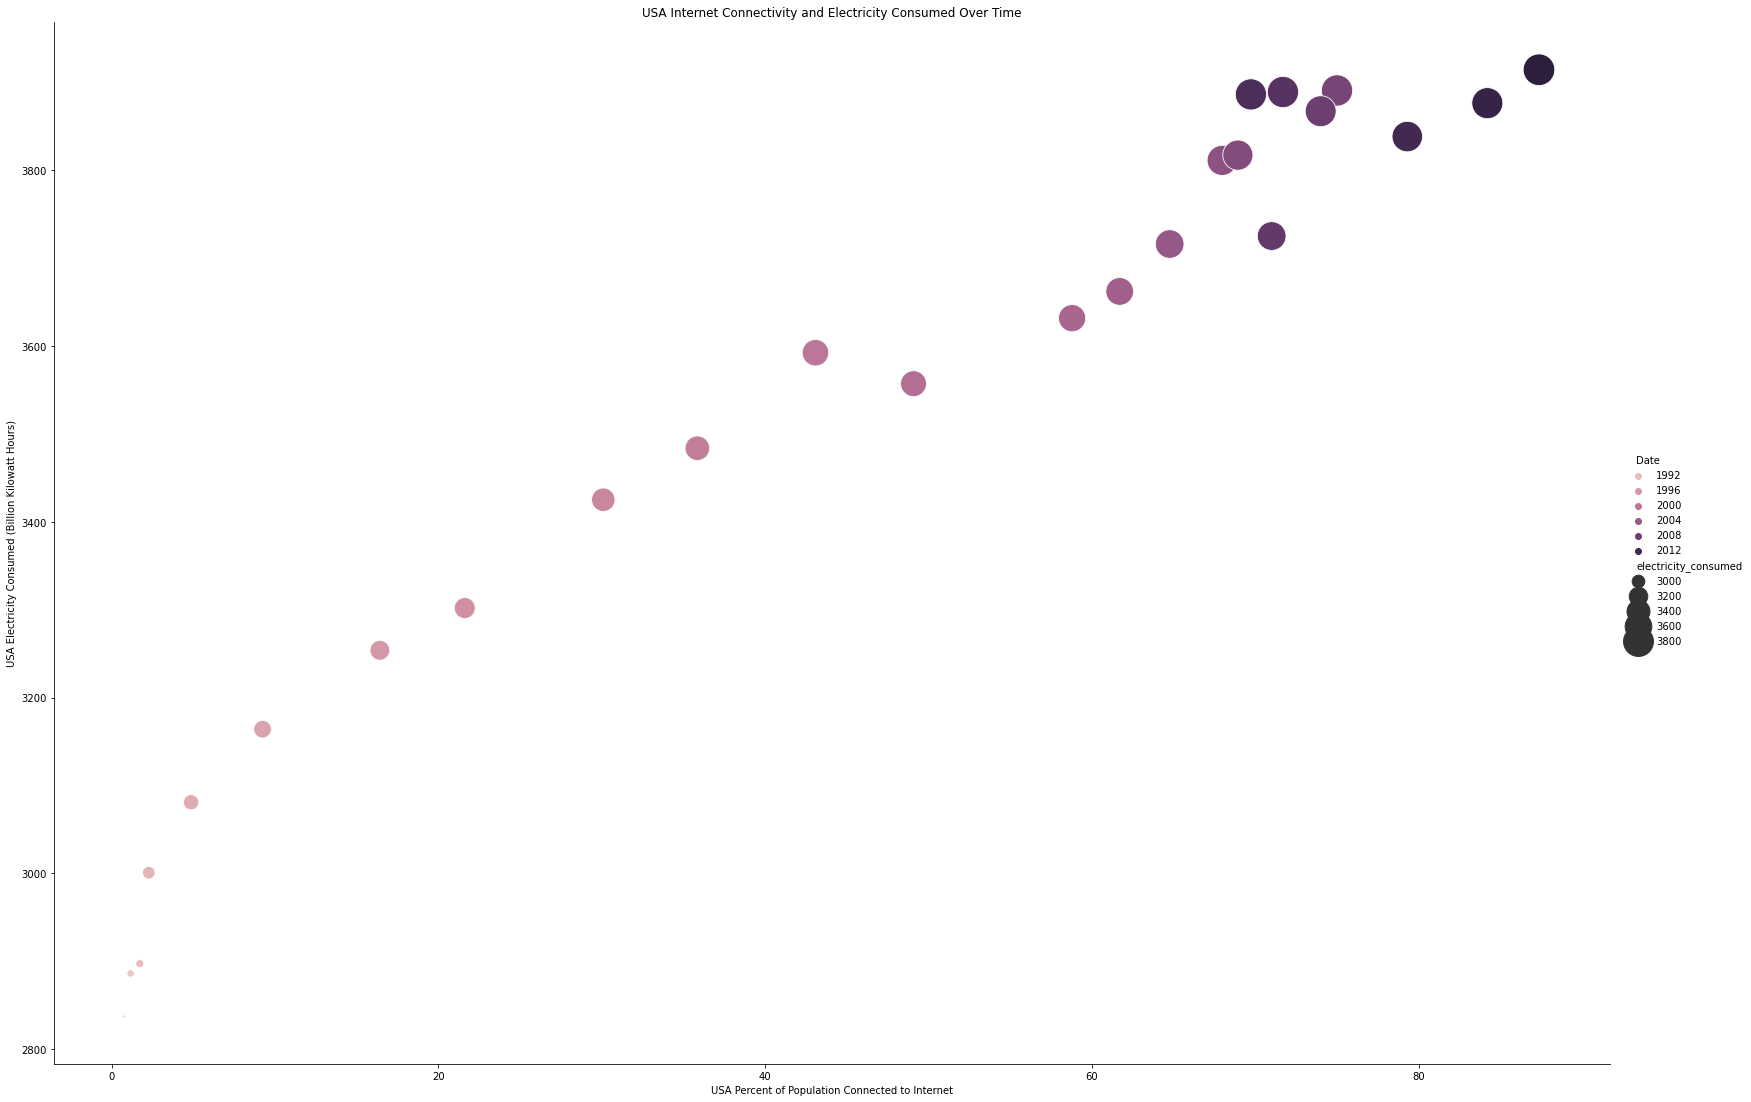

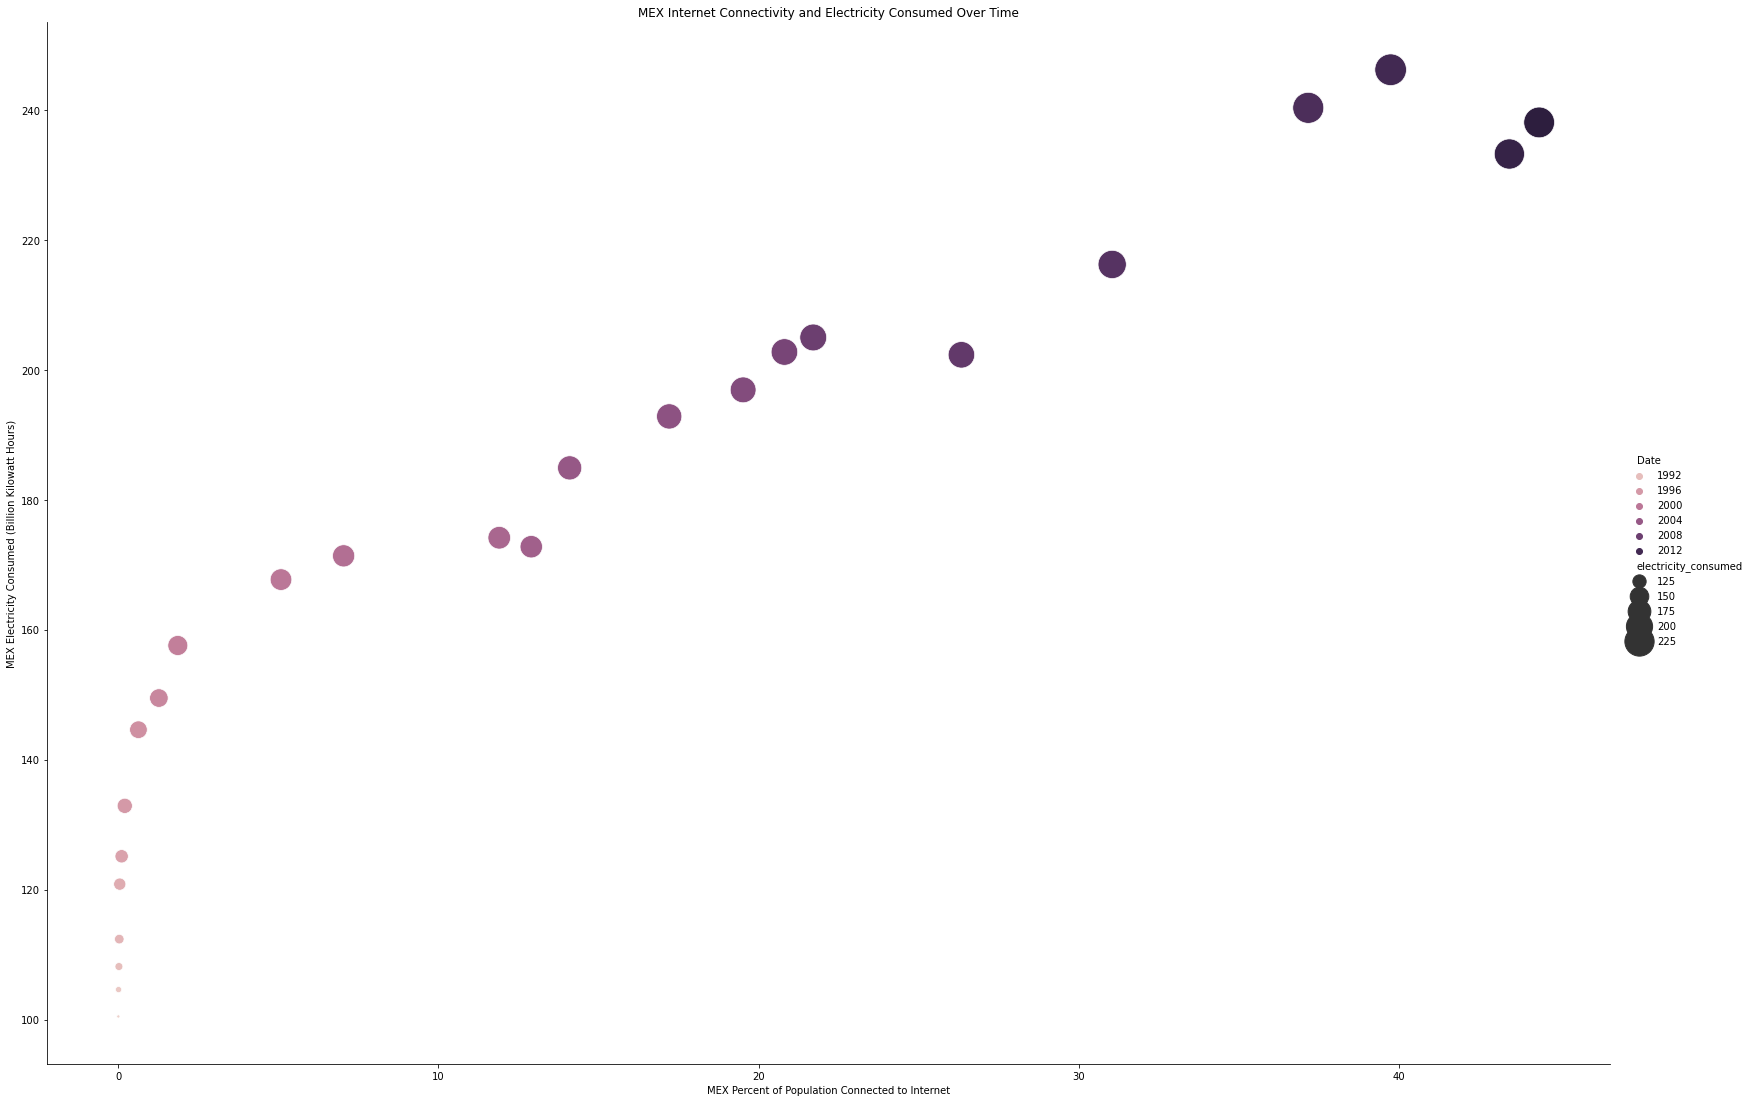

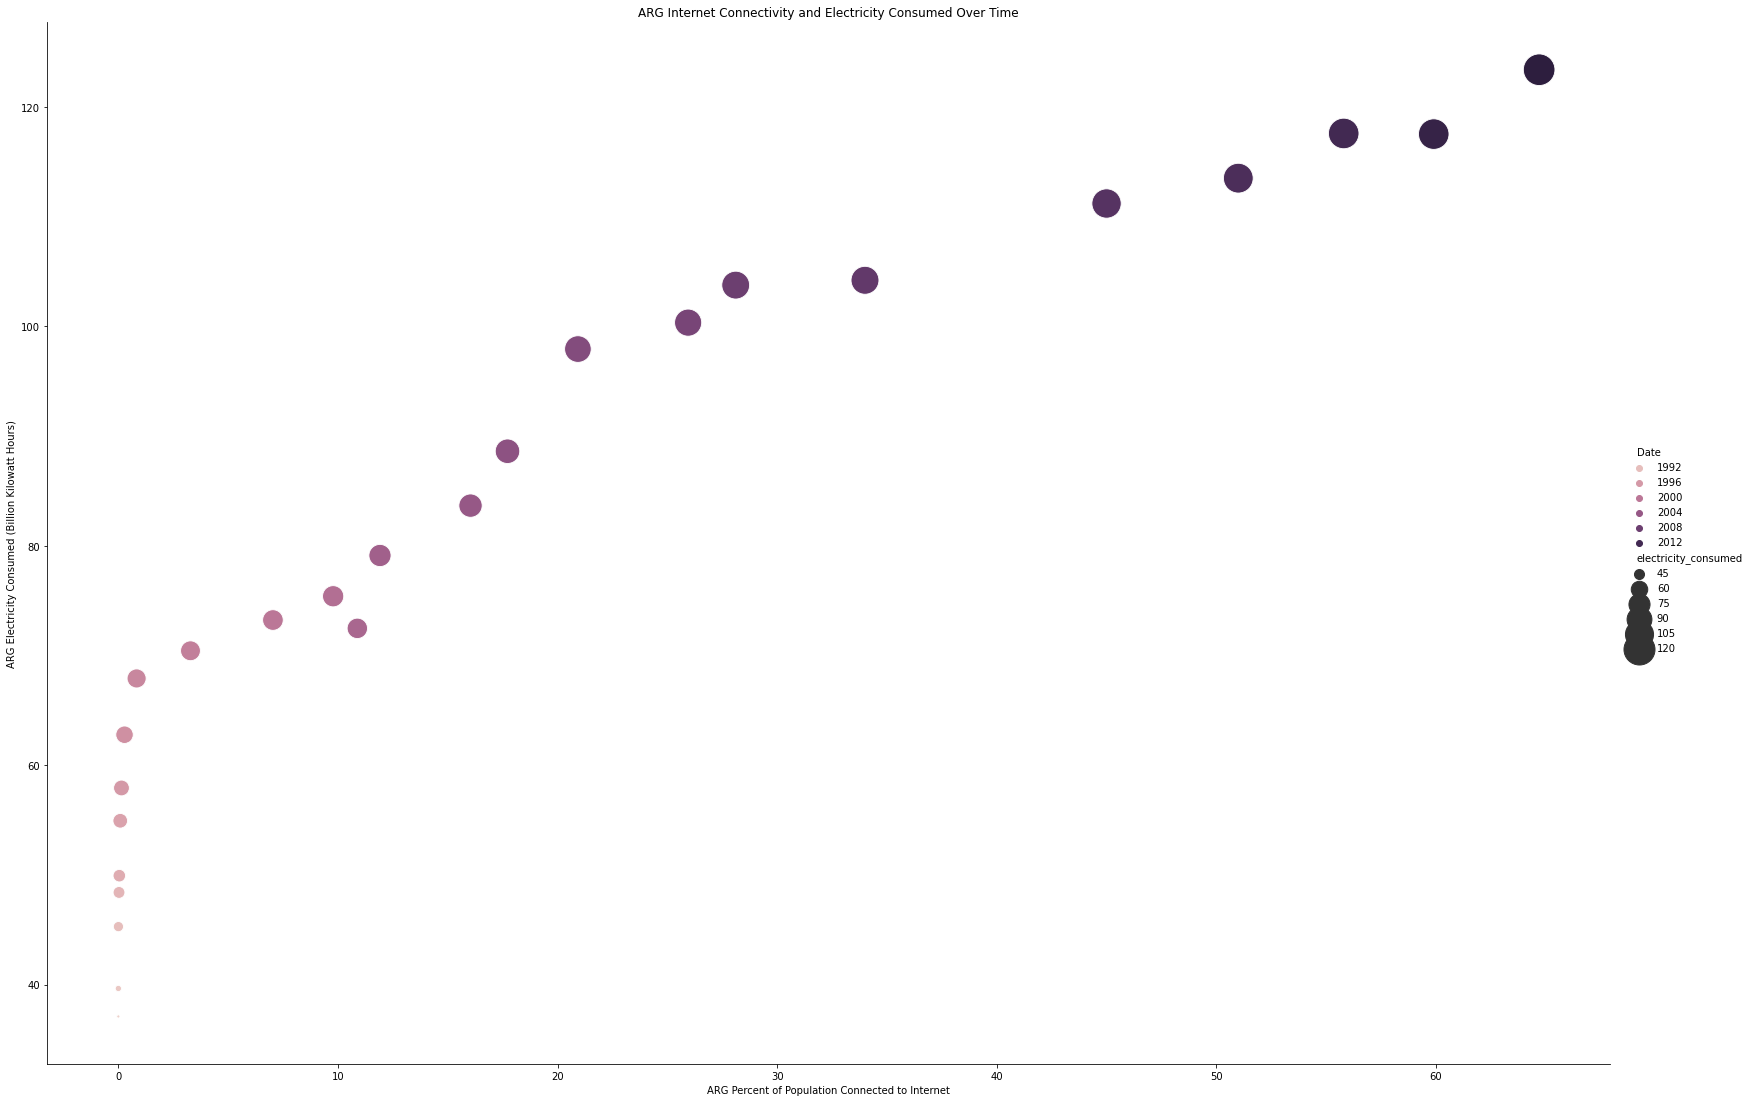

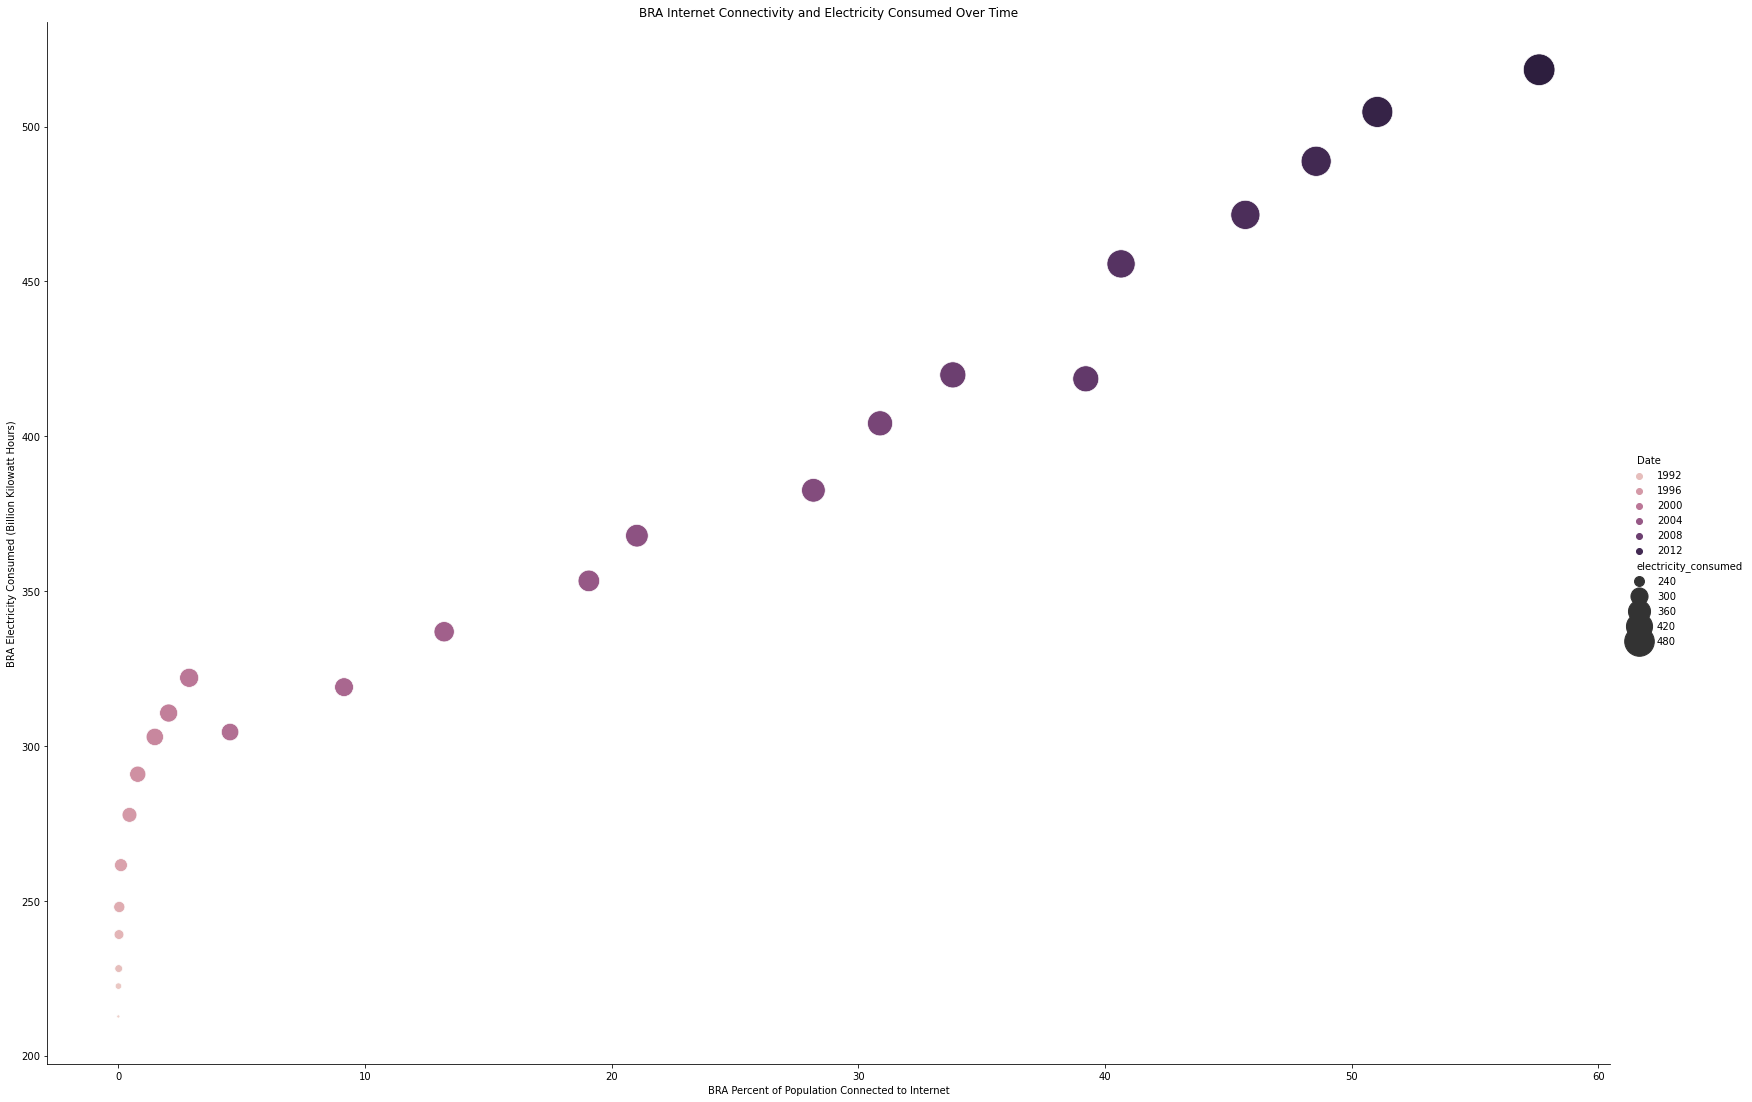

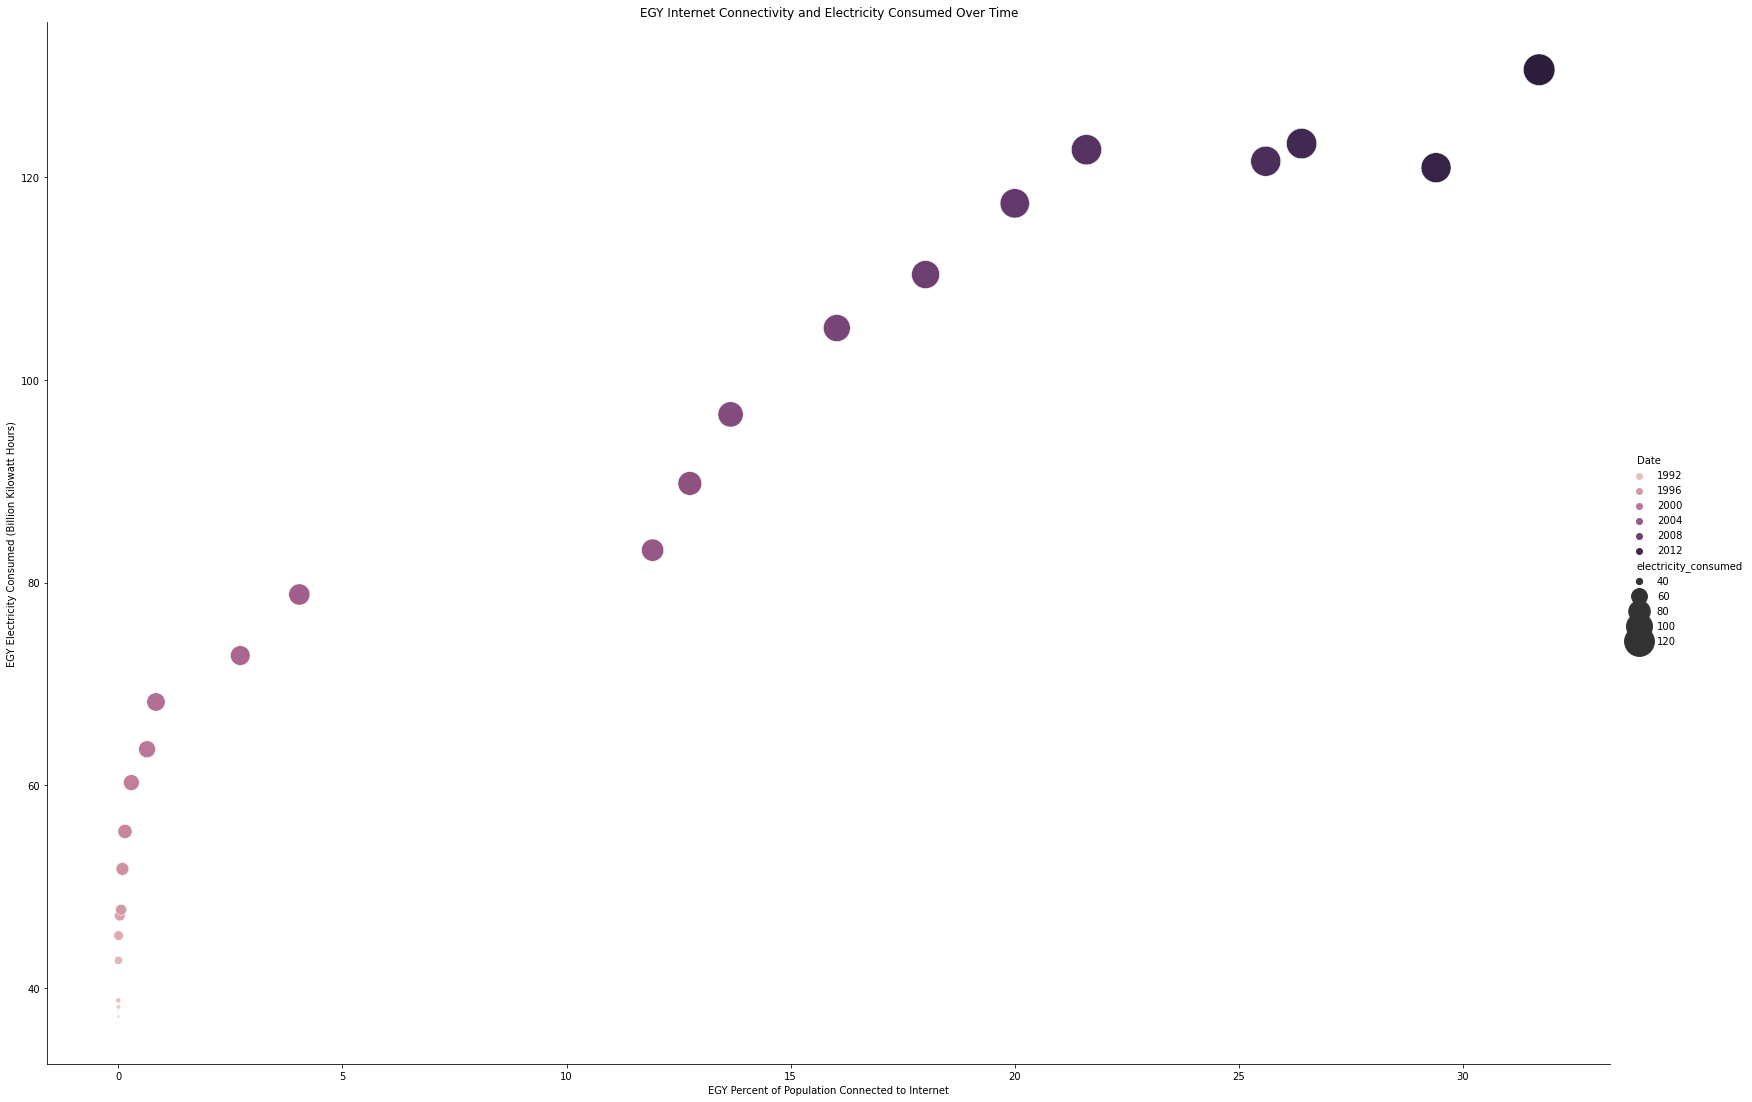

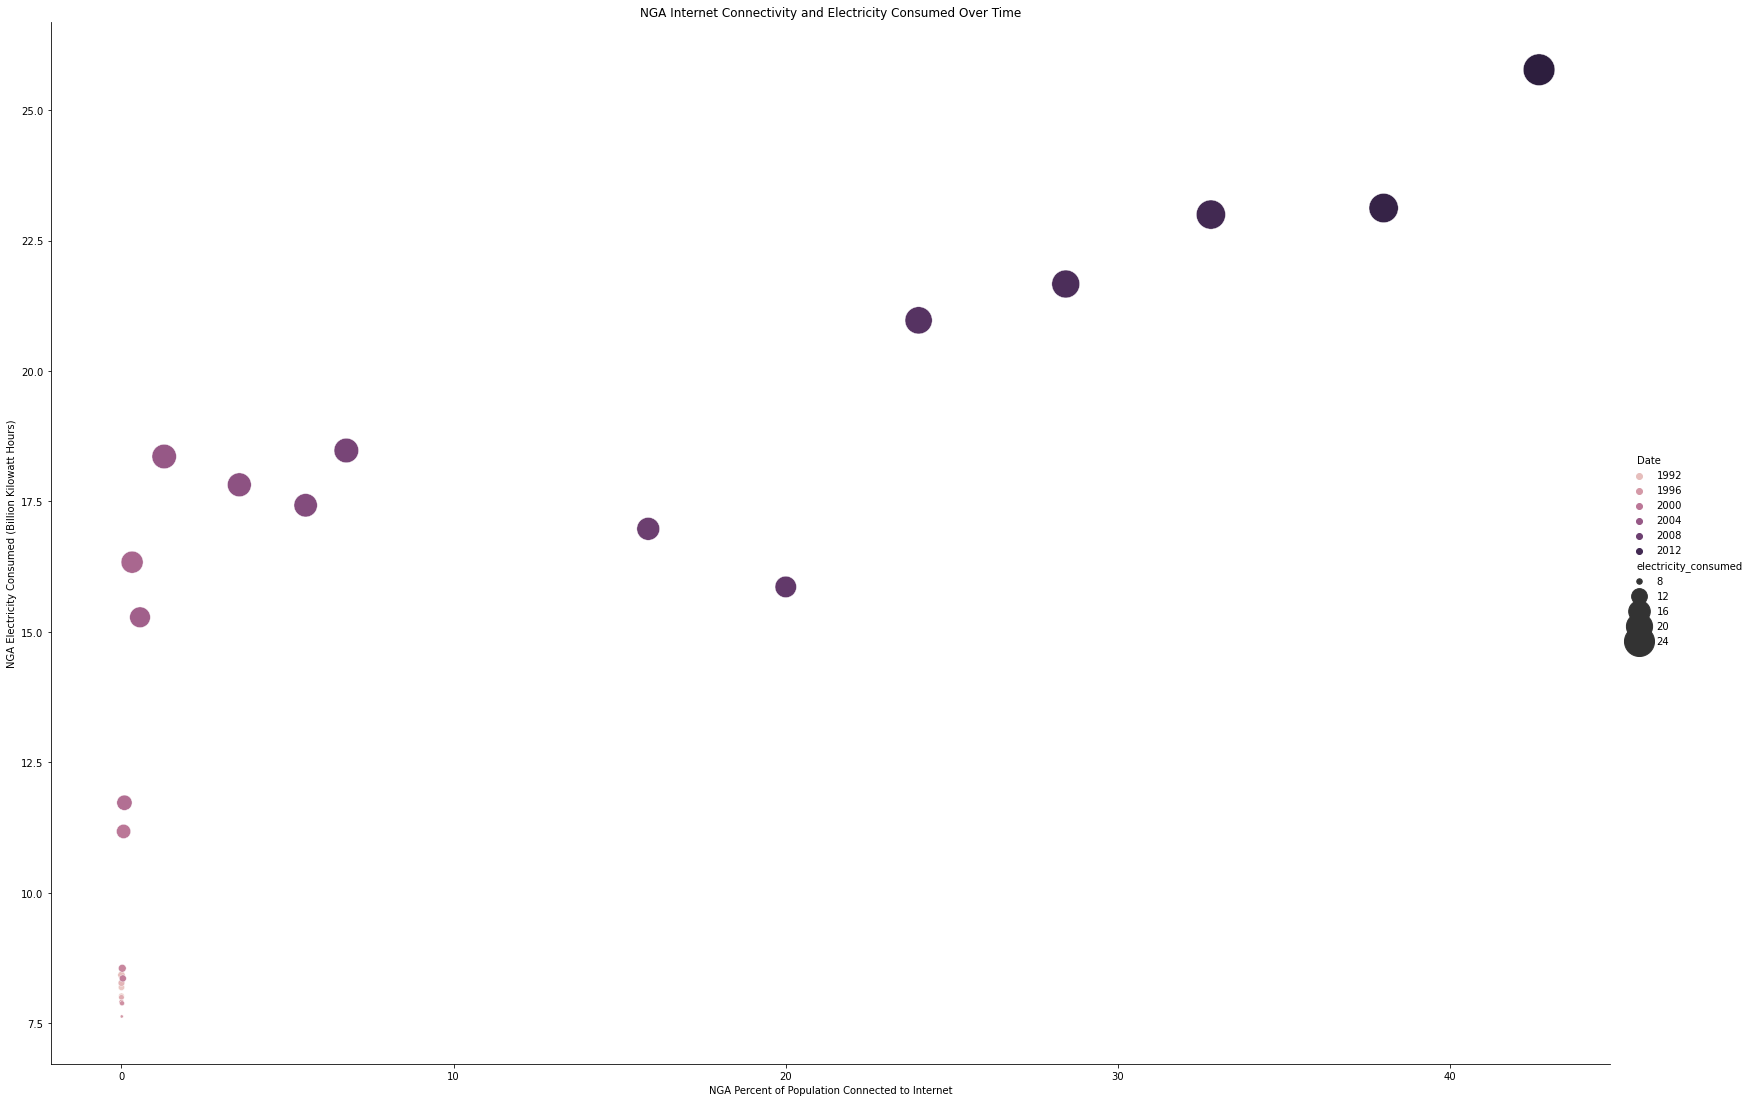

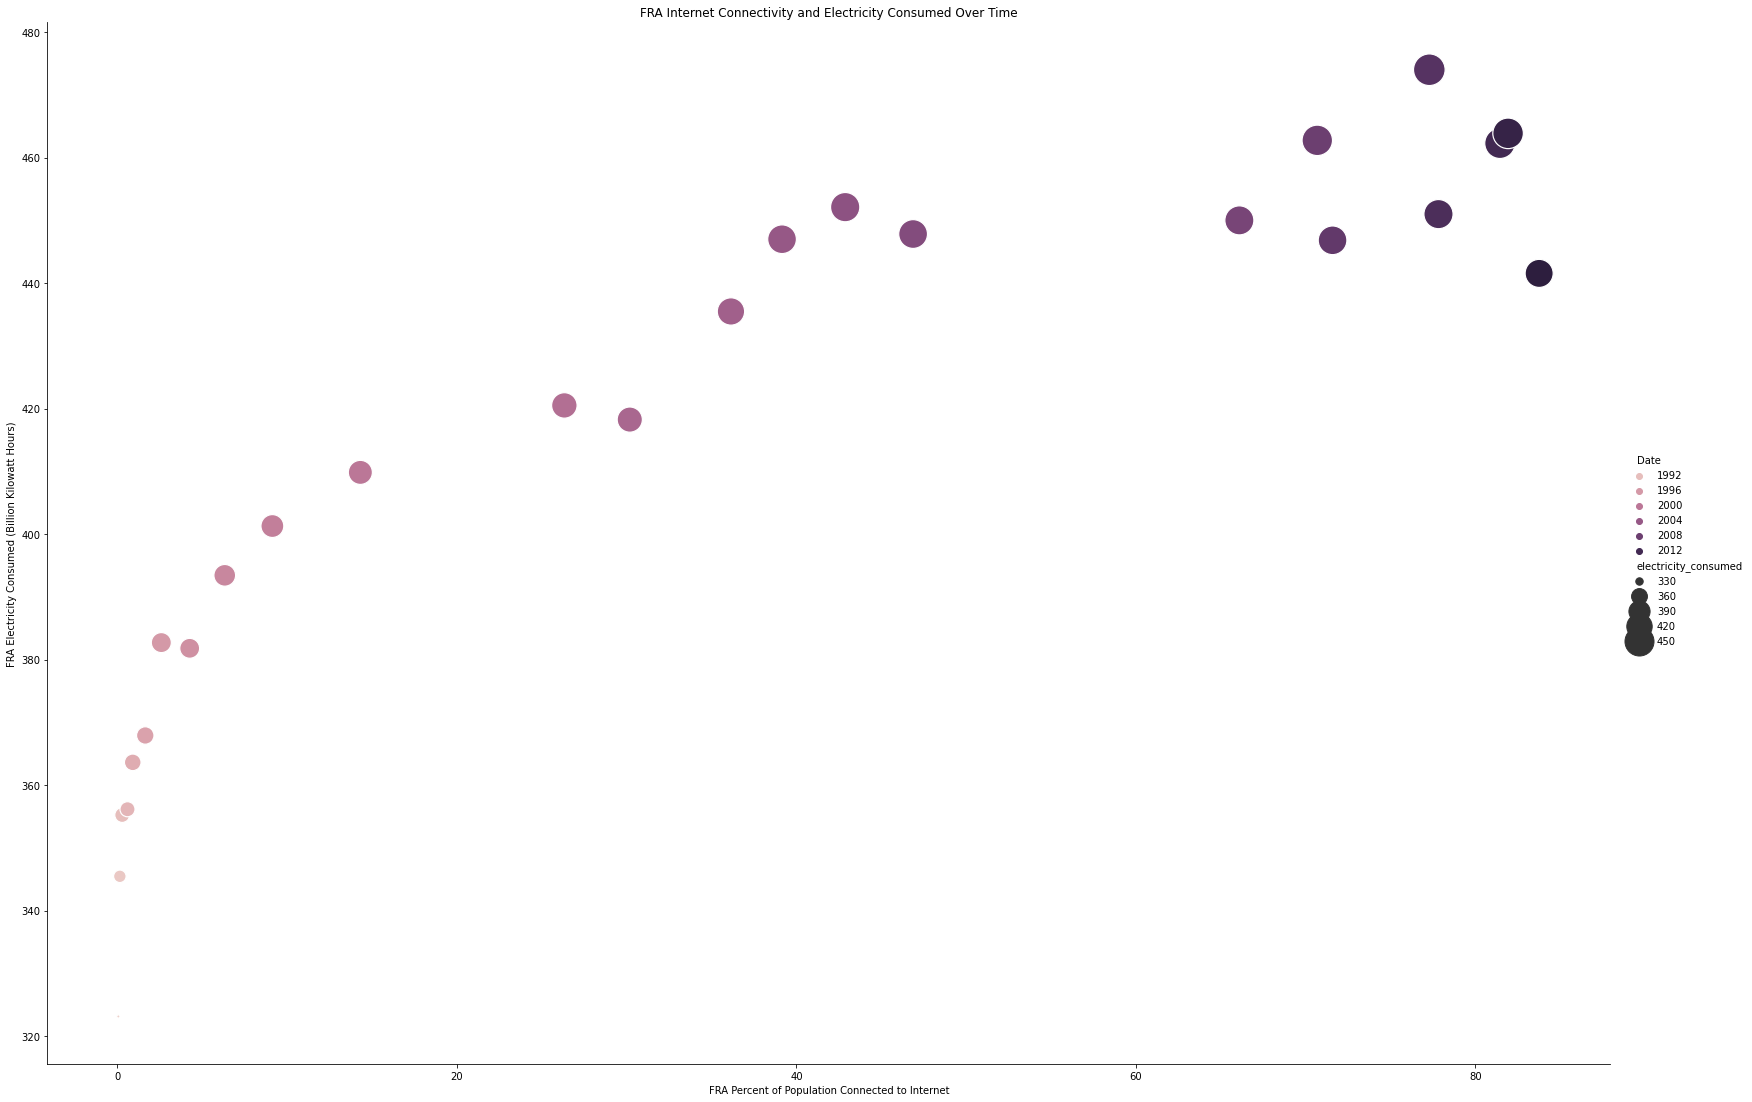

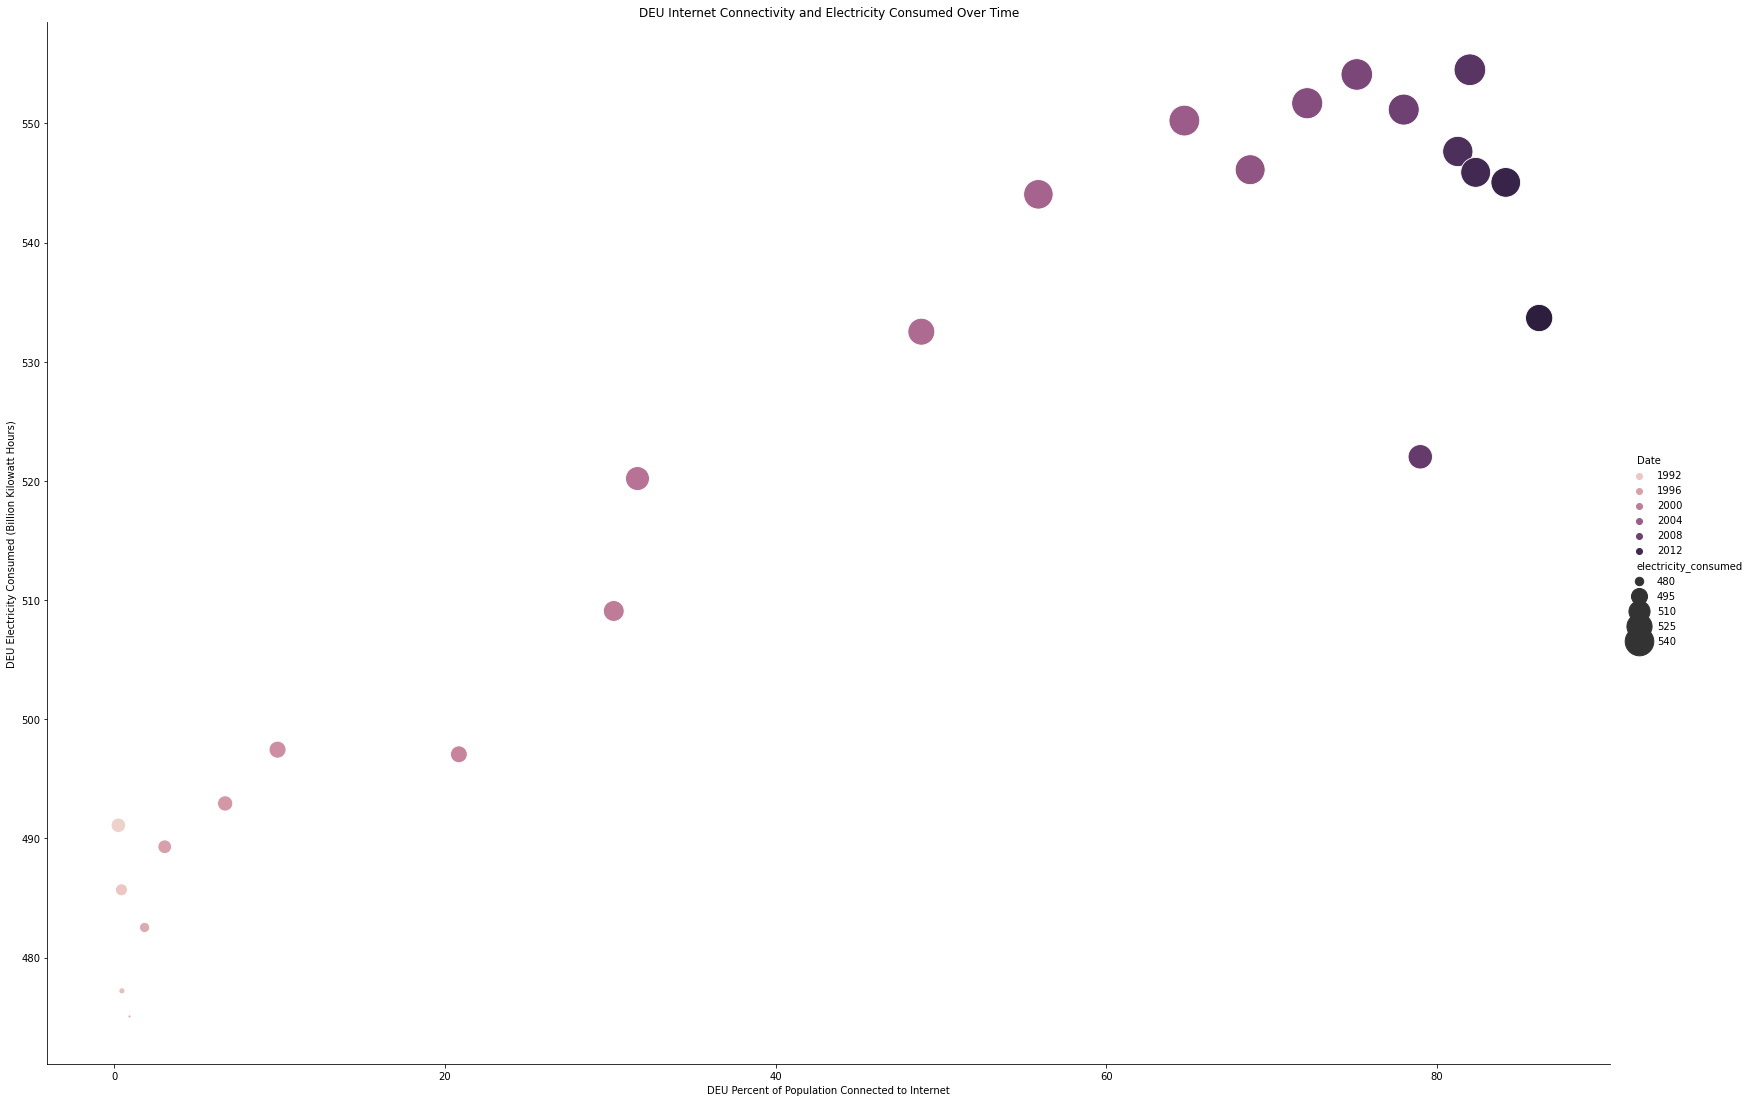

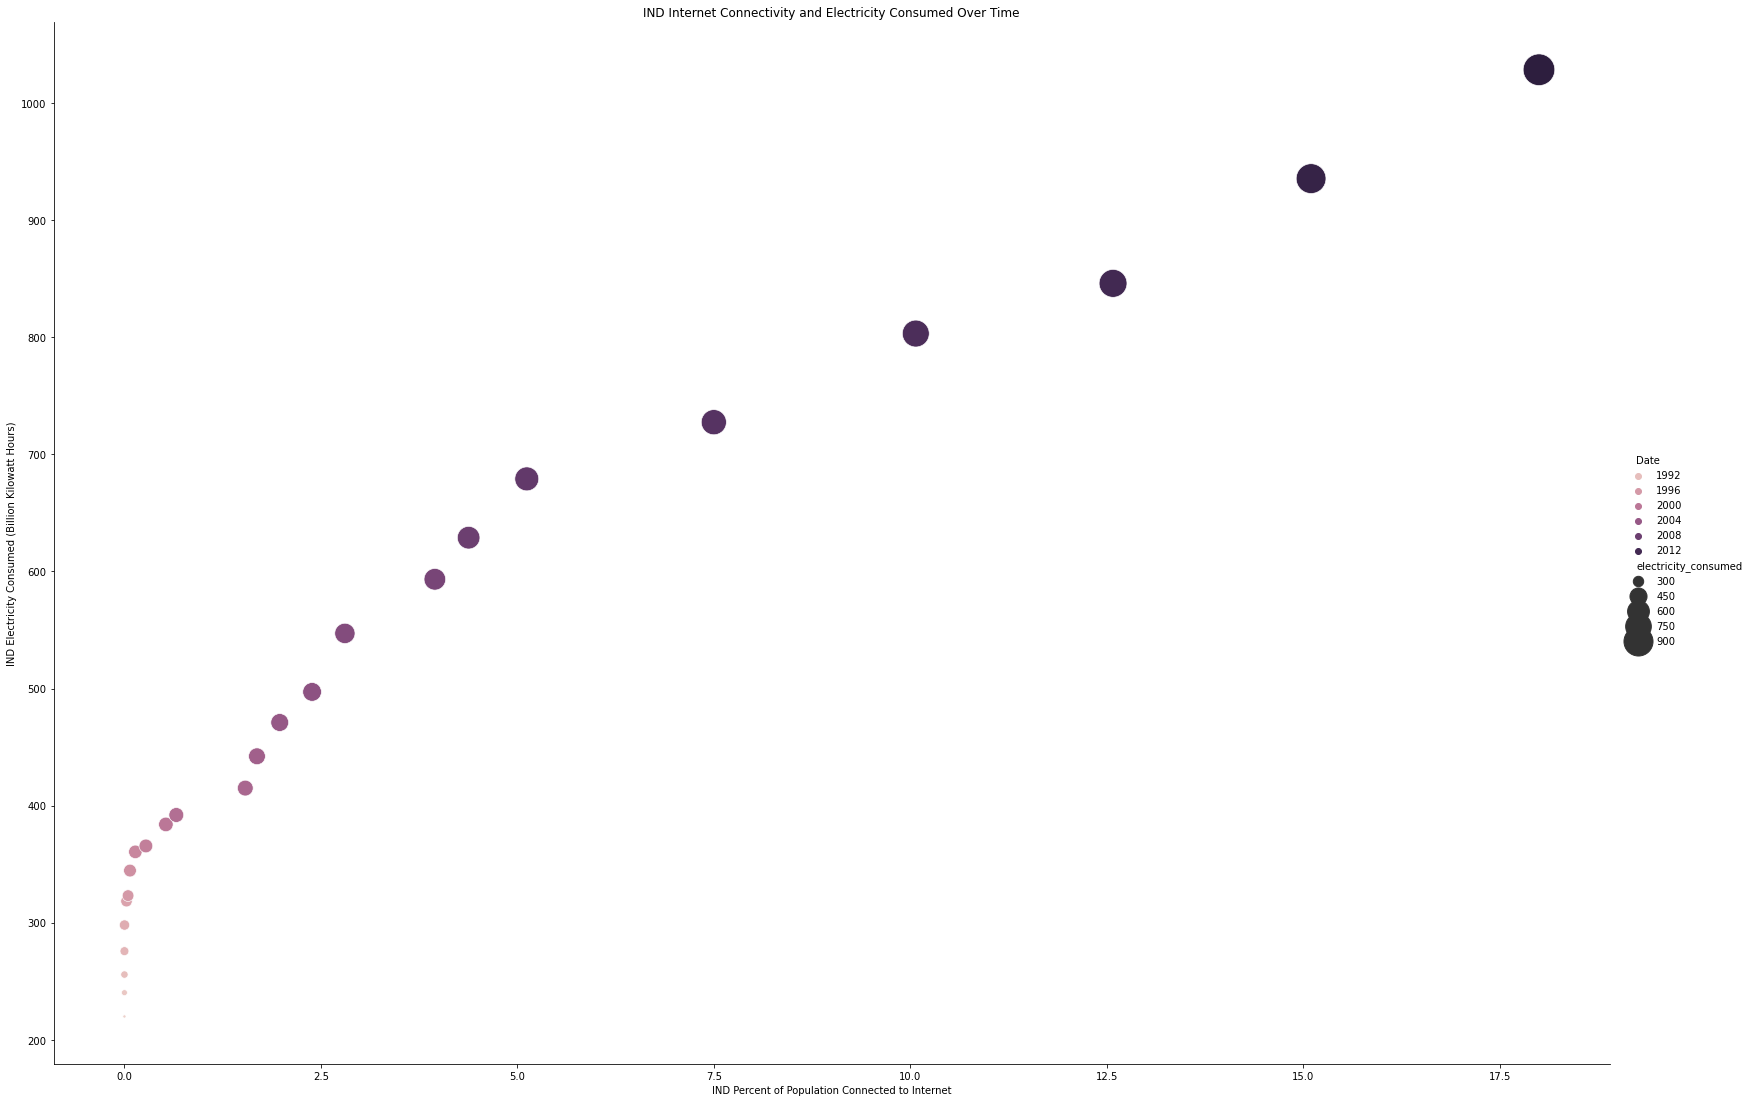

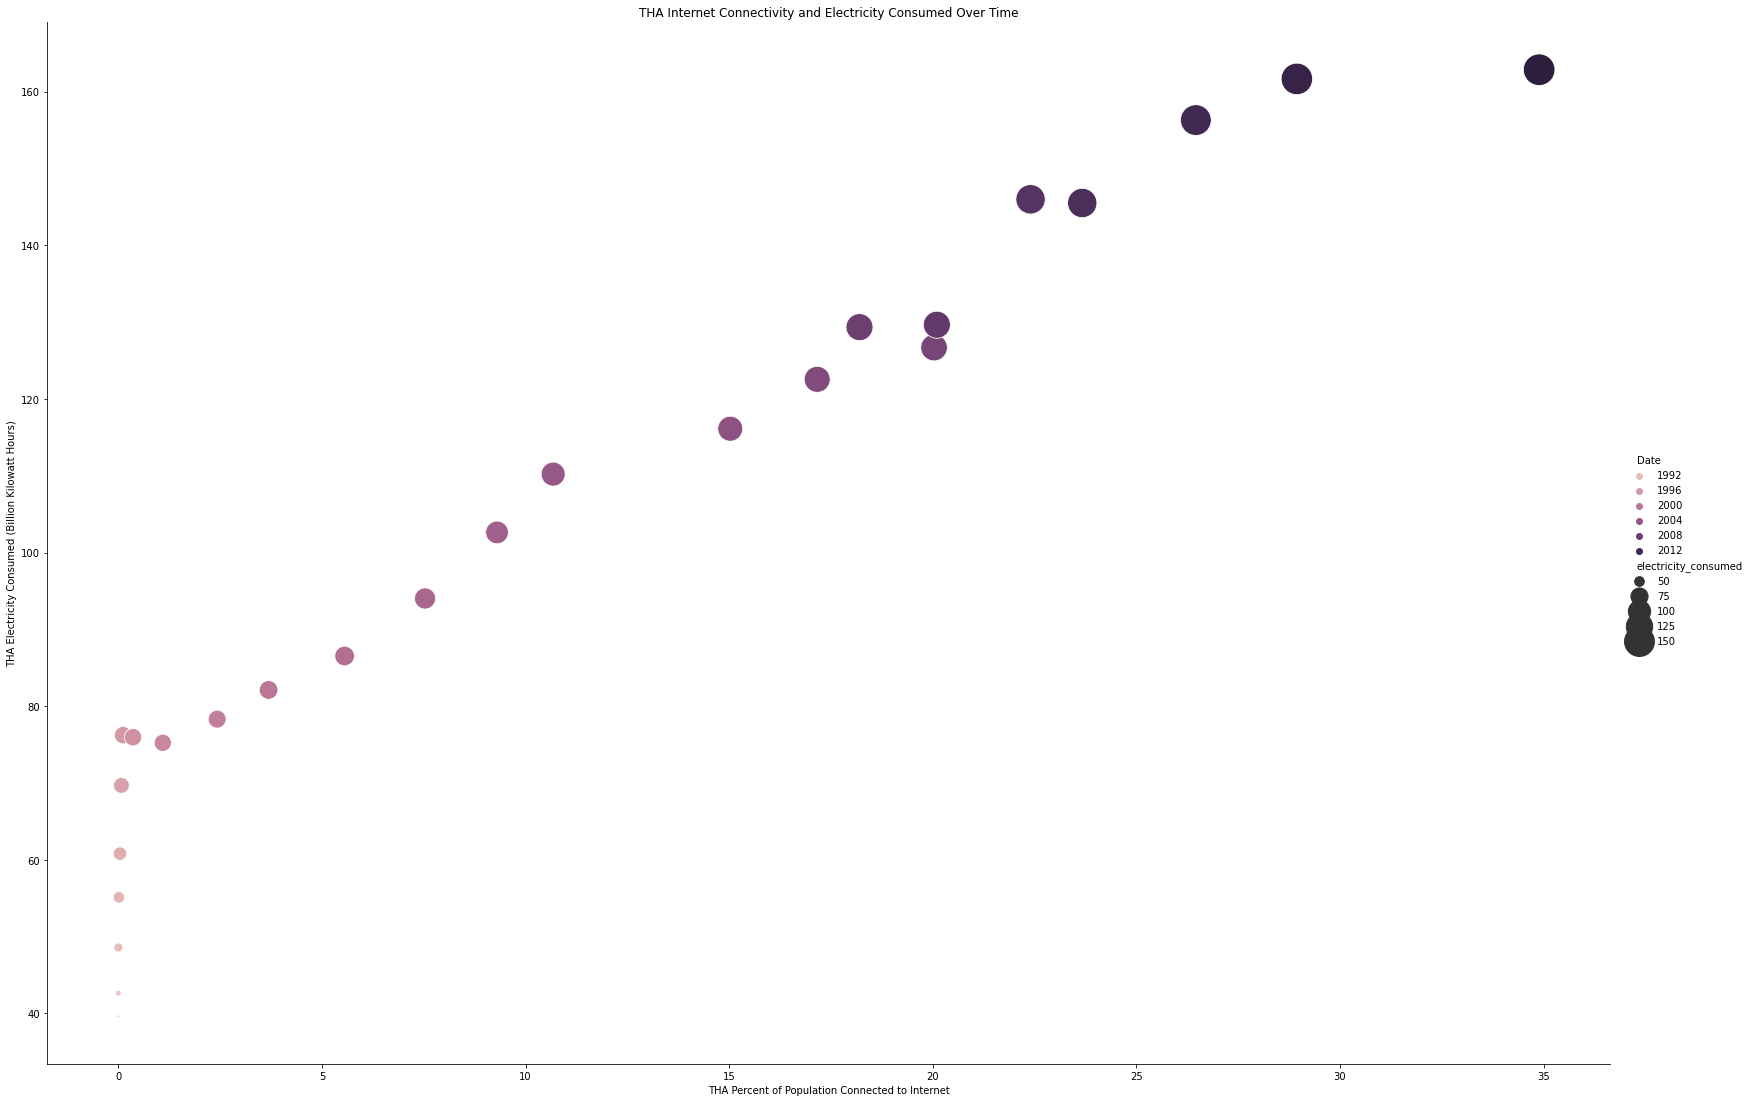

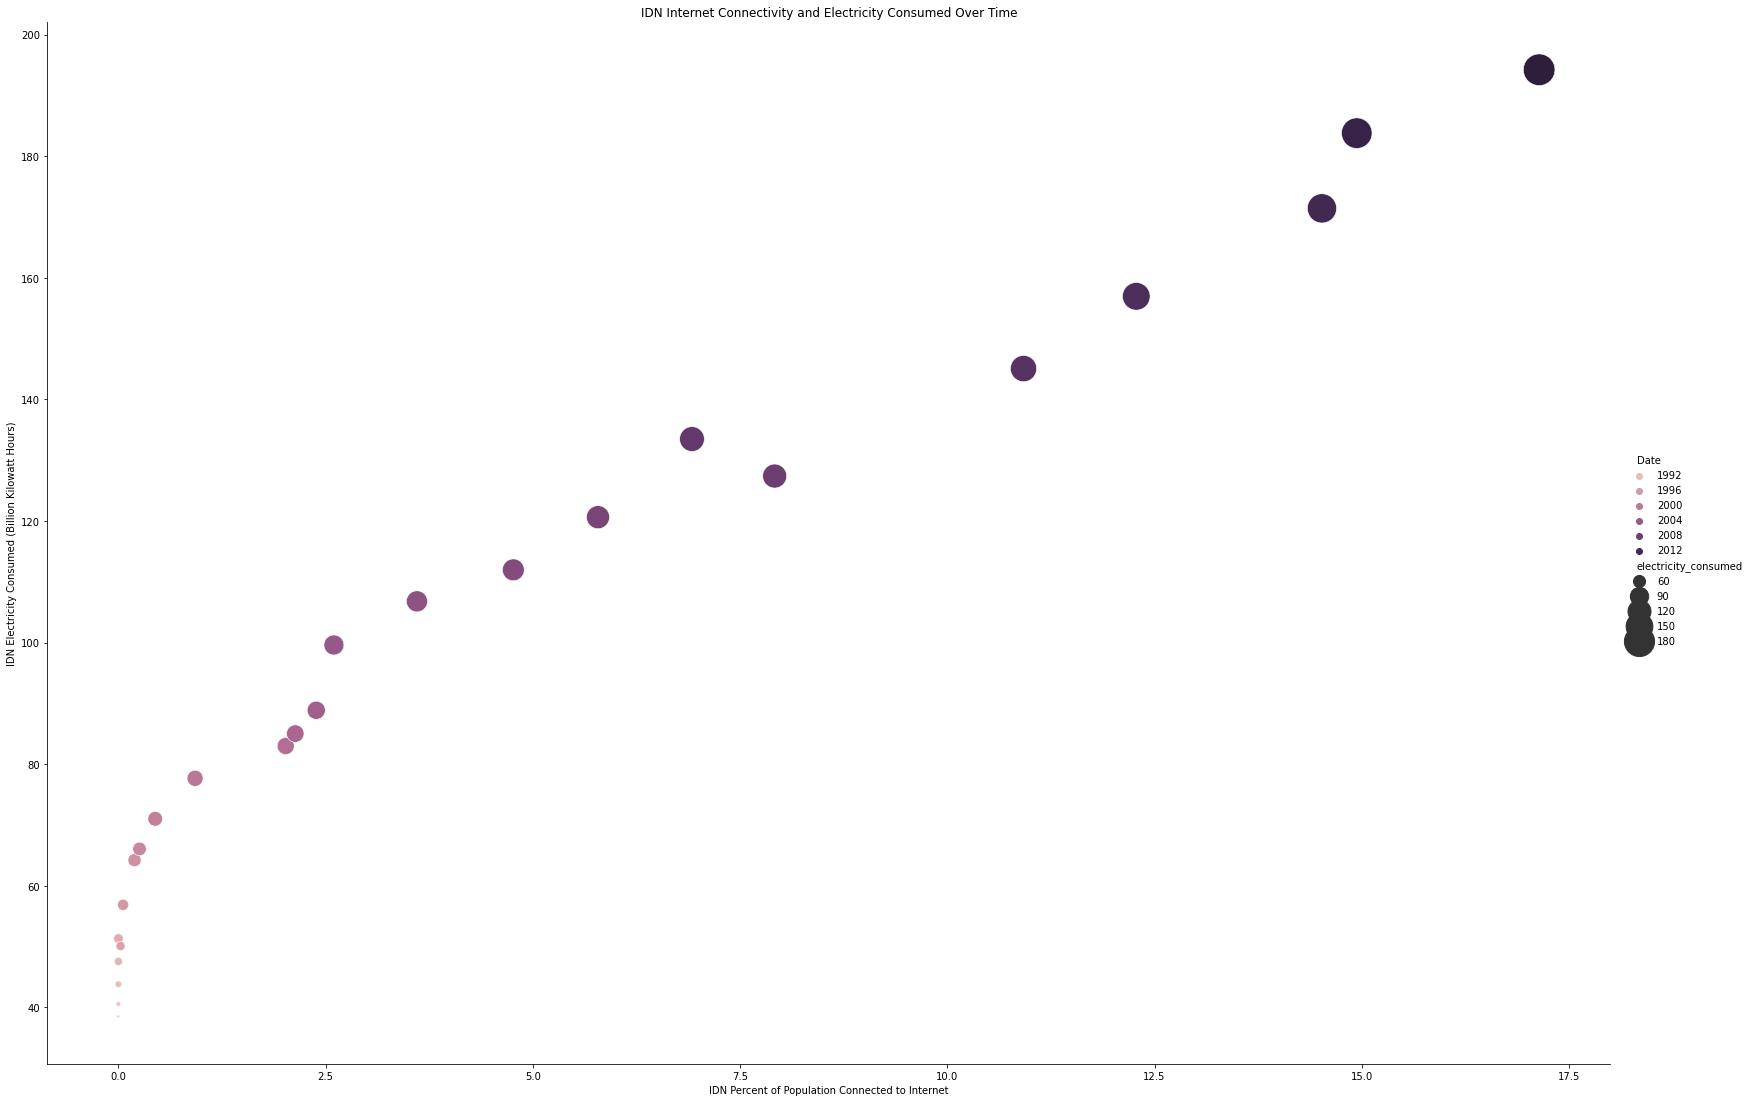

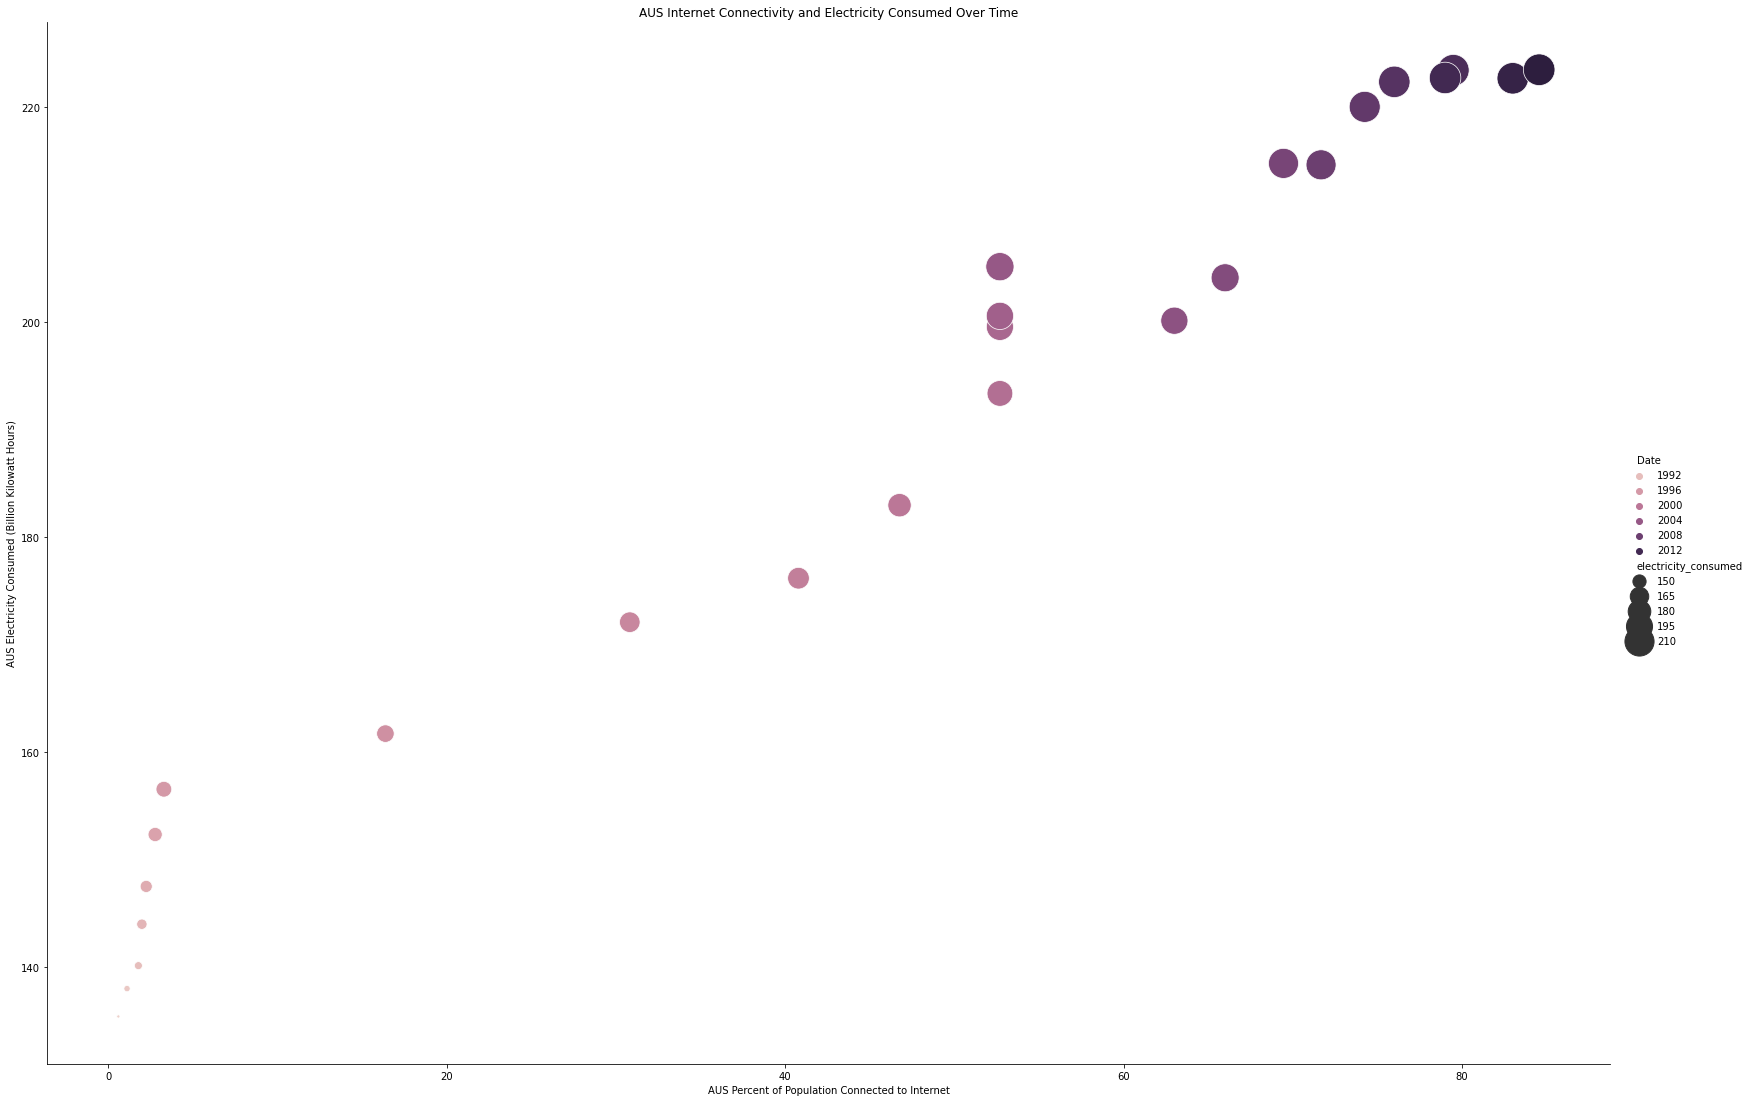

In [32]:
for country in top_12:
    _ = sns.relplot(x="int_perc", y="electricity_consumed", hue = 'Date', size="electricity_consumed", kind = 'scatter',
            sizes=(10, 1000), alpha=1,
            height=15, aspect = 1.5, data=df.loc[country])

    _ = plt.ylabel(str(country) + ' Electricity Consumed (Billion Kilowatt Hours)')
    _ = plt.xlabel(str(country) + ' Percent of Population Connected to Internet')
    _ = plt.title(str(country) + ' Internet Connectivity and Electricity Consumed Over Time')

From this analysis I have:

- Concluded which features are most correlated (according to a linear regression) with the target feature, electricity consumed. 

- Removed all null values for modeling.

- Visually shown that there is similar trend amongst countries in the dataset in regards to electricity consumed, internet connectivity, gdp, and population. 

Next, I will begin modeling and attempt to figure out which model is most effective in predicting the target feature, electricity consumed.